In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [12]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 1], [1, 1, 0, 0]]


In [13]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:979
number of class2:638

 ****** Running generation 0 ****** 

Population's average fitness: 0.46770 stdev: 0.09160
Best fitness: 0.66914 - size: (2, 13) - species 1 - id 120
Average adjusted fitness: 0.182
Mean genetic distance 2.990, standard deviation 0.489
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.734 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53637 stdev: 0.09560
Best fitness: 0.70006 - size: (2, 13) - species 20 - id 326
Average adjusted fitness: 0.247
Mean genetic distance 3.099, standard deviation 0.500
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.064 sec (5.899 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56190 stdev: 0.08765
Best fitness: 0.70006 - size: (4, 17) - species 14 - id 471
Average adjusted fitness: 0.240
Mean genetic distance 3.135, standard deviation 0.495
Population of 197 members in 40 species
Total extinct

Population's average fitness: 0.63067 stdev: 0.10211
Best fitness: 0.78231 - size: (6, 21) - species 14 - id 2659
Average adjusted fitness: 0.263
Mean genetic distance 3.273, standard deviation 0.491
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.094 sec (8.492 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63252 stdev: 0.09965
Best fitness: 0.78355 - size: (9, 26) - species 26 - id 3279
Average adjusted fitness: 0.322
Mean genetic distance 3.275, standard deviation 0.495
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 11.475 sec (8.586 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62843 stdev: 0.10213
Best fitness: 0.78541 - size: (5, 20) - species 14 - id 3419
Average adjusted fitness: 0.265
Mean genetic distance 3.280, standard deviation 0.502
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.891 sec (8.541 average)

 *****

Population's average fitness: 0.64202 stdev: 0.10554
Best fitness: 0.78912 - size: (10, 26) - species 36 - id 5292
Average adjusted fitness: 0.247
Mean genetic distance 3.355, standard deviation 0.497
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 11.170 sec (9.786 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64079 stdev: 0.11705
Best fitness: 0.78912 - size: (10, 26) - species 36 - id 5292
Average adjusted fitness: 0.241
Mean genetic distance 3.331, standard deviation 0.510
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 11.490 sec (10.056 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62673 stdev: 0.12082
Best fitness: 0.78912 - size: (10, 26) - species 36 - id 5292
Average adjusted fitness: 0.221
Mean genetic distance 3.331, standard deviation 0.507
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 9.647 sec (10.045 average)



Population's average fitness: 0.64052 stdev: 0.11550
Best fitness: 0.80767 - size: (12, 31) - species 4 - id 10493
Average adjusted fitness: 0.277
Mean genetic distance 3.281, standard deviation 0.611
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 12.631 sec (10.440 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64055 stdev: 0.11641
Best fitness: 0.80767 - size: (12, 31) - species 4 - id 10493
Average adjusted fitness: 0.263
Mean genetic distance 3.284, standard deviation 0.601
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.846 sec (10.544 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63461 stdev: 0.12362
Best fitness: 0.80767 - size: (12, 31) - species 4 - id 10493
Average adjusted fitness: 0.329
Mean genetic distance 3.274, standard deviation 0.586
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.416 sec (10.622 average)

Population's average fitness: 0.64353 stdev: 0.12625
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.299
Mean genetic distance 3.261, standard deviation 0.595
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.868 sec (11.891 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.66174 stdev: 0.12174
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.285
Mean genetic distance 3.302, standard deviation 0.639
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.370 sec (12.272 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.64584 stdev: 0.12961
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.265
Mean genetic distance 3.305, standard deviation 0.620
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.960 sec (12.293 avera

Population's average fitness: 0.69312 stdev: 0.11609
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.296
Mean genetic distance 3.129, standard deviation 0.657
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 8.755 sec (9.382 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.67286 stdev: 0.12610
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.415
Mean genetic distance 3.146, standard deviation 0.656
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 8.704 sec (9.290 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.69377 stdev: 0.10192
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.297
Mean genetic distance 3.134, standard deviation 0.670
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 8.742 sec (9.165 average)


Population's average fitness: 0.69935 stdev: 0.11239
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.302
Mean genetic distance 3.065, standard deviation 0.576
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 9.842 sec (9.993 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.70503 stdev: 0.10739
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.303
Mean genetic distance 3.095, standard deviation 0.605
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 10.074 sec (10.068 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.70729 stdev: 0.10968
Best fitness: 0.82560 - size: (19, 44) - species 67 - id 11662
Average adjusted fitness: 0.382
Mean genetic distance 3.114, standard deviation 0.588
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 10.336 sec (10.120 avera

Population's average fitness: 0.62827 stdev: 0.10354
Best fitness: 0.78912 - size: (6, 22) - species 14 - id 2471
Average adjusted fitness: 0.291
Mean genetic distance 3.220, standard deviation 0.481
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 6.995 sec (6.929 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61897 stdev: 0.10481
Best fitness: 0.78912 - size: (6, 22) - species 14 - id 2471
Average adjusted fitness: 0.259
Mean genetic distance 3.220, standard deviation 0.484
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 6.876 sec (6.946 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62617 stdev: 0.09704
Best fitness: 0.78912 - size: (6, 22) - species 14 - id 2471
Average adjusted fitness: 0.253
Mean genetic distance 3.193, standard deviation 0.478
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.898 sec (6.971 average)

 ******

Generation time: 7.922 sec (7.652 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62040 stdev: 0.11824
Best fitness: 0.81942 - size: (6, 23) - species 5 - id 6250
Average adjusted fitness: 0.218
Mean genetic distance 3.247, standard deviation 0.561
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 7.912 sec (7.710 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.61624 stdev: 0.11892
Best fitness: 0.81942 - size: (6, 23) - species 5 - id 6250
Average adjusted fitness: 0.268
Mean genetic distance 3.229, standard deviation 0.556
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 8.076 sec (7.786 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62626 stdev: 0.10492
Best fitness: 0.81942 - size: (6, 23) - species 5 - id 6250
Average adjusted fitness: 0.279
Mean genetic distance 3.220, standard deviation 0.565
Population of 194 members in 16 

Population's average fitness: 0.62642 stdev: 0.11368
Best fitness: 0.82622 - size: (7, 23) - species 48 - id 7744
Average adjusted fitness: 0.269
Mean genetic distance 3.203, standard deviation 0.584
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 9.145 sec (9.364 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62323 stdev: 0.11671
Best fitness: 0.82622 - size: (7, 23) - species 48 - id 7744
Average adjusted fitness: 0.249
Mean genetic distance 3.200, standard deviation 0.574
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 9.517 sec (9.373 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63416 stdev: 0.11586
Best fitness: 0.82622 - size: (7, 23) - species 48 - id 7744
Average adjusted fitness: 0.303
Mean genetic distance 3.176, standard deviation 0.583
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 9.475 sec (9.385 average)

 ******

Population's average fitness: 0.64361 stdev: 0.12851
Best fitness: 0.83117 - size: (13, 38) - species 5 - id 11801
Average adjusted fitness: 0.327
Mean genetic distance 3.178, standard deviation 0.560
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 11.111 sec (10.648 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65658 stdev: 0.11543
Best fitness: 0.83117 - size: (13, 38) - species 5 - id 11801
Average adjusted fitness: 0.290
Mean genetic distance 3.196, standard deviation 0.549
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 11.141 sec (10.747 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.63911 stdev: 0.12412
Best fitness: 0.83117 - size: (13, 38) - species 5 - id 11801
Average adjusted fitness: 0.291
Mean genetic distance 3.192, standard deviation 0.556
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 11.206 sec (10.839 average)

Population's average fitness: 0.66928 stdev: 0.12275
Best fitness: 0.83488 - size: (19, 46) - species 80 - id 17996
Average adjusted fitness: 0.306
Mean genetic distance 3.259, standard deviation 0.593
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.740 sec (11.704 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.67132 stdev: 0.11824
Best fitness: 0.83488 - size: (19, 46) - species 80 - id 17996
Average adjusted fitness: 0.333
Mean genetic distance 3.248, standard deviation 0.574
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 12.125 sec (11.810 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.65801 stdev: 0.12477
Best fitness: 0.83488 - size: (19, 46) - species 80 - id 17996
Average adjusted fitness: 0.309
Mean genetic distance 3.250, standard deviation 0.580
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 11.691 sec (11.848 ave

Population's average fitness: 0.64946 stdev: 0.12348
Best fitness: 0.83735 - size: (13, 40) - species 5 - id 19684
Average adjusted fitness: 0.316
Mean genetic distance 3.211, standard deviation 0.543
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 12.531 sec (12.164 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.65493 stdev: 0.12203
Best fitness: 0.83735 - size: (13, 40) - species 5 - id 19684
Average adjusted fitness: 0.367
Mean genetic distance 3.196, standard deviation 0.549
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 11.856 sec (12.142 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.66088 stdev: 0.11083
Best fitness: 0.83735 - size: (13, 40) - species 5 - id 19684
Average adjusted fitness: 0.279
Mean genetic distance 3.182, standard deviation 0.570
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 11.777 sec (12.130 averag

Total extinctions: 0
Generation time: 6.598 sec (6.442 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68903 stdev: 0.10971
Best fitness: 0.83364 - size: (4, 15) - species 6 - id 2229
Average adjusted fitness: 0.392
Mean genetic distance 3.184, standard deviation 0.478
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.631 sec (6.504 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68289 stdev: 0.12196
Best fitness: 0.83364 - size: (4, 15) - species 6 - id 2229
Average adjusted fitness: 0.408
Mean genetic distance 3.182, standard deviation 0.478
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.519 sec (6.538 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67564 stdev: 0.13093
Best fitness: 0.83364 - size: (4, 15) - species 6 - id 2229
Average adjusted fitness: 0.441
Mean genetic distance 3.220, standard deviation 0.480
Population 

Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.546 sec (7.466 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.70131 stdev: 0.11210
Best fitness: 0.85962 - size: (4, 15) - species 40 - id 3408
Average adjusted fitness: 0.407
Mean genetic distance 3.252, standard deviation 0.555
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 7.796 sec (7.528 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.70228 stdev: 0.12027
Best fitness: 0.85962 - size: (4, 15) - species 40 - id 3408
Average adjusted fitness: 0.403
Mean genetic distance 3.270, standard deviation 0.549
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 7.767 sec (7.576 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.69163 stdev: 0.12388
Best fitness: 0.85962 - size: (4, 15) - species 40 - id 3408
Average adjusted fitness: 0.435
Mean genetic distance 

Mean genetic distance 3.243, standard deviation 0.610
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.263 sec (8.866 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.71678 stdev: 0.10198
Best fitness: 0.86704 - size: (12, 31) - species 46 - id 9459
Average adjusted fitness: 0.408
Mean genetic distance 3.252, standard deviation 0.612
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.167 sec (8.925 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.69382 stdev: 0.14259
Best fitness: 0.86704 - size: (12, 31) - species 46 - id 9459
Average adjusted fitness: 0.409
Mean genetic distance 3.273, standard deviation 0.625
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 9.281 sec (8.975 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.71293 stdev: 0.11754
Best fitness: 0.86704 - size: (12, 31) - species 46 - id 94

Mean genetic distance 3.159, standard deviation 0.601
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 9.827 sec (10.331 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.69911 stdev: 0.13004
Best fitness: 0.87755 - size: (13, 35) - species 46 - id 11788
Average adjusted fitness: 0.402
Mean genetic distance 3.158, standard deviation 0.605
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 10.056 sec (10.344 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.71070 stdev: 0.11622
Best fitness: 0.87755 - size: (13, 35) - species 46 - id 11788
Average adjusted fitness: 0.409
Mean genetic distance 3.158, standard deviation 0.593
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 9.820 sec (10.260 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.71425 stdev: 0.10172
Best fitness: 0.87755 - size: (13, 35) - species 46 -

Population's average fitness: 0.68640 stdev: 0.14084
Best fitness: 0.88559 - size: (14, 37) - species 46 - id 16342
Average adjusted fitness: 0.392
Mean genetic distance 3.216, standard deviation 0.574
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.227 sec (10.267 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.68678 stdev: 0.13279
Best fitness: 0.88559 - size: (14, 37) - species 65 - id 16342
Average adjusted fitness: 0.383
Mean genetic distance 3.226, standard deviation 0.574
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 10.396 sec (10.221 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.68459 stdev: 0.13018
Best fitness: 0.88559 - size: (14, 37) - species 65 - id 16342
Average adjusted fitness: 0.392
Mean genetic distance 3.207, standard deviation 0.572
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 10.518 sec (10.212 ave

Population's average fitness: 0.68470 stdev: 0.14110
Best fitness: 0.88559 - size: (14, 37) - species 65 - id 16342
Average adjusted fitness: 0.361
Mean genetic distance 3.075, standard deviation 0.617
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 11.642 sec (11.558 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.69804 stdev: 0.12178
Best fitness: 0.88559 - size: (14, 37) - species 65 - id 16342
Average adjusted fitness: 0.438
Mean genetic distance 3.076, standard deviation 0.586
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 11.913 sec (11.609 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.69344 stdev: 0.13189
Best fitness: 0.88559 - size: (14, 37) - species 65 - id 16342
Average adjusted fitness: 0.388
Mean genetic distance 3.102, standard deviation 0.583
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 12.146 sec (11.700 ave

Population's average fitness: 0.58275 stdev: 0.08484
Best fitness: 0.75077 - size: (4, 18) - species 6 - id 1211
Average adjusted fitness: 0.249
Mean genetic distance 3.017, standard deviation 0.481
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.402 sec (5.962 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59732 stdev: 0.08424
Best fitness: 0.75510 - size: (5, 20) - species 6 - id 1376
Average adjusted fitness: 0.248
Mean genetic distance 3.036, standard deviation 0.479
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.547 sec (6.027 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59909 stdev: 0.08149
Best fitness: 0.78108 - size: (8, 23) - species 2 - id 1498
Average adjusted fitness: 0.237
Mean genetic distance 3.077, standard deviation 0.487
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.468 sec (6.071 average)

 ****** Runn

Population's average fitness: 0.63280 stdev: 0.09165
Best fitness: 0.78788 - size: (11, 29) - species 2 - id 2941
Average adjusted fitness: 0.233
Mean genetic distance 3.225, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.571 sec (6.942 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62818 stdev: 0.09700
Best fitness: 0.78788 - size: (11, 29) - species 2 - id 2941
Average adjusted fitness: 0.243
Mean genetic distance 3.231, standard deviation 0.492
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.341 sec (7.017 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.65355 stdev: 0.08506
Best fitness: 0.78788 - size: (11, 29) - species 2 - id 2941
Average adjusted fitness: 0.239
Mean genetic distance 3.214, standard deviation 0.493
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.140 sec (7.067 average)

 ******

Total extinctions: 0
Generation time: 8.599 sec (8.130 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63942 stdev: 0.09164
Best fitness: 0.79344 - size: (7, 22) - species 29 - id 7616
Average adjusted fitness: 0.214
Mean genetic distance 3.296, standard deviation 0.562
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 8.202 sec (8.137 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63437 stdev: 0.09682
Best fitness: 0.79344 - size: (8, 25) - species 47 - id 8082
Average adjusted fitness: 0.307
Mean genetic distance 3.317, standard deviation 0.556
Population of 206 members in 15 species
Total extinctions: 0
Generation time: 8.290 sec (8.196 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.63035 stdev: 0.09257
Best fitness: 0.79344 - size: (8, 25) - species 47 - id 8082
Average adjusted fitness: 0.180
Mean genetic distance 3.284, standard deviation 0.576
Populati

Population's average fitness: 0.63938 stdev: 0.09332
Best fitness: 0.80087 - size: (9, 26) - species 52 - id 8619
Average adjusted fitness: 0.234
Mean genetic distance 3.325, standard deviation 0.575
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 8.413 sec (8.515 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.64161 stdev: 0.10123
Best fitness: 0.80087 - size: (9, 26) - species 52 - id 8619
Average adjusted fitness: 0.277
Mean genetic distance 3.305, standard deviation 0.594
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 8.369 sec (8.509 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.64438 stdev: 0.10094
Best fitness: 0.80087 - size: (9, 26) - species 52 - id 8619
Average adjusted fitness: 0.269
Mean genetic distance 3.329, standard deviation 0.588
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 8.887 sec (8.558 average)

 ******

Population's average fitness: 0.65495 stdev: 0.09522
Best fitness: 0.80952 - size: (9, 25) - species 52 - id 16103
Average adjusted fitness: 0.180
Mean genetic distance 3.241, standard deviation 0.586
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 8.683 sec (8.740 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.65278 stdev: 0.09922
Best fitness: 0.80952 - size: (9, 25) - species 52 - id 16103
Average adjusted fitness: 0.305
Mean genetic distance 3.204, standard deviation 0.617
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 8.387 sec (8.722 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.65682 stdev: 0.10030
Best fitness: 0.80952 - size: (9, 25) - species 52 - id 16103
Average adjusted fitness: 0.212
Mean genetic distance 3.179, standard deviation 0.657
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 8.484 sec (8.687 average)

 *

Population's average fitness: 0.64432 stdev: 0.09509
Best fitness: 0.82066 - size: (9, 24) - species 52 - id 18641
Average adjusted fitness: 0.268
Mean genetic distance 3.254, standard deviation 0.592
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 9.320 sec (9.218 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.64815 stdev: 0.10018
Best fitness: 0.82066 - size: (9, 24) - species 52 - id 18641
Average adjusted fitness: 0.280
Mean genetic distance 3.231, standard deviation 0.604
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.211 sec (9.220 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.64605 stdev: 0.09503
Best fitness: 0.82066 - size: (9, 24) - species 52 - id 18641
Average adjusted fitness: 0.248
Mean genetic distance 3.232, standard deviation 0.600
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 8.851 sec (9.195 average)

 *

In [14]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [15]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [16]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6055555555555555

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[12  1  0  0  0  0  0  0  4  1]
 [ 4  8  0  0  2  0  1  0  4  0]
 [ 0  0 14  2  0  0  1  4  0  0]
 [ 0  1  1  4  0  0  0  0  0  0]
 [ 0  5  1  0 15  0  0  2  3  0]
 [ 0  1  0  8  0 12  0  0  1  1]
 [ 0  1  0  1  0  0 16  0  2  1]
 [ 0  1  1  0  1  0  0 11  1  0]
 [ 0  0  0  3  2  0  0  2  2  0]
 [ 0  1  0  0  0  6  0  0  0 15]]


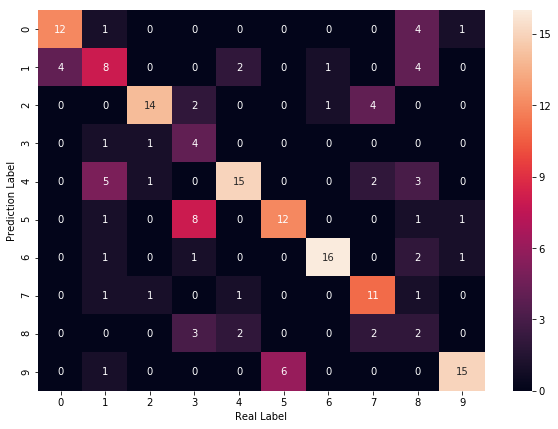

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [19]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[9] real:5
#1 min_error:1 index:[2 4 6 7] real:2
#2 min_error:1 index:[1 4 6] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 4 6] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[2 4 6 7] real:1
#10 min_error:0 index:[2] real:7
#11 min_error:0 index:[8] real:4
#12 min_error:1 index:[2 4 6 7] real:6
#13 min_error:0 index:[6] real:3
#14 min_error:1 index:[1 4 6] real:1
#15 min_error:0 index:[5] real:3
#16 min_error:0 index:[9] real:9
#17 min_error:1 index:[1 4 6] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[1] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[4] real:1
#24 min_error:1 index:[1 4 6] real:4
#25 min_error:0 index:[1] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[1 4 6] real:6
#29 min_err

In [21]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.575139146567718
Avg Base Learner:0.8438466295609153


In [22]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.18333333333333332
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.45


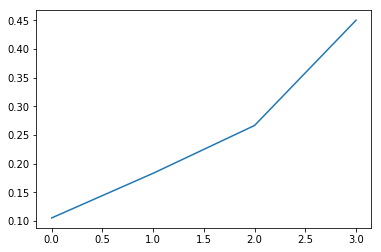

In [23]:
plt.plot(range(4),list_acc)
plt.show()

In [24]:
list_acc

[0.10555555555555556, 0.18333333333333332, 0.26666666666666666, 0.45]